In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Signal wave, Fourier Transform & STFT:

(2000,)


Text(0.5, 1.0, 'fft')

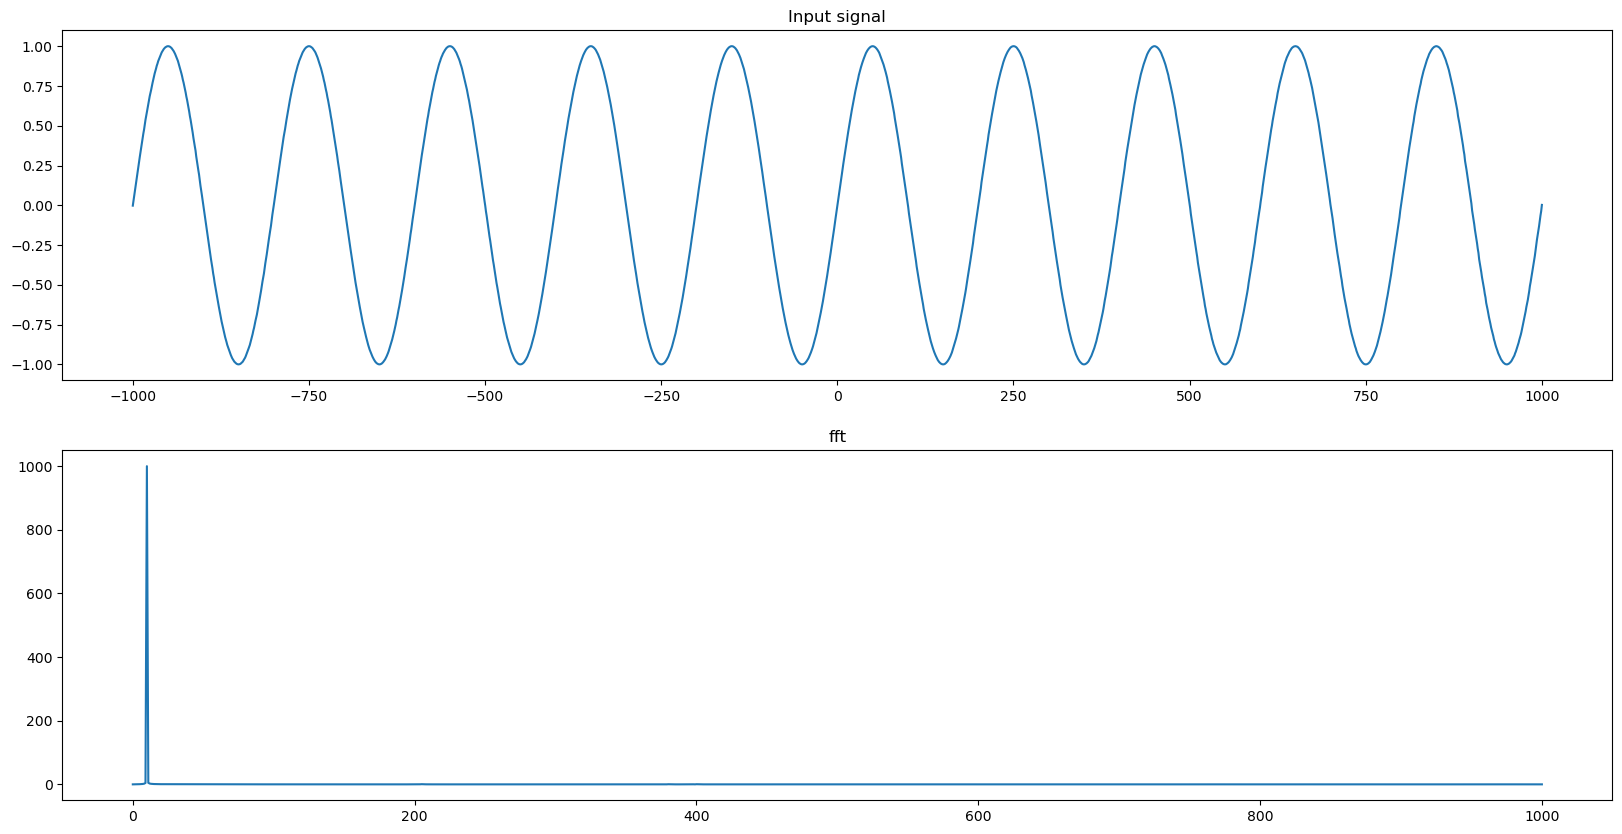

In [10]:
# fourier transform:

# signal with freq_1:
fig, axis = plt.subplots(2, figsize= (20,10))
L = 2000
x = tf.linspace(-L/2, L/2, L)
# making signal:
# here we ahve taken amplitude as 10
signal = tf.math.sin(x*2*np.pi*10)

print(signal.shape)
axis[0].plot(x, signal)
axis[0].set_title("Input signal")

fft = tf.signal.rfft(signal)
axis[1].plot(tf.abs(fft))
axis[1].set_title("fft")

(2000,)


Text(0.5, 1.0, 'fft')

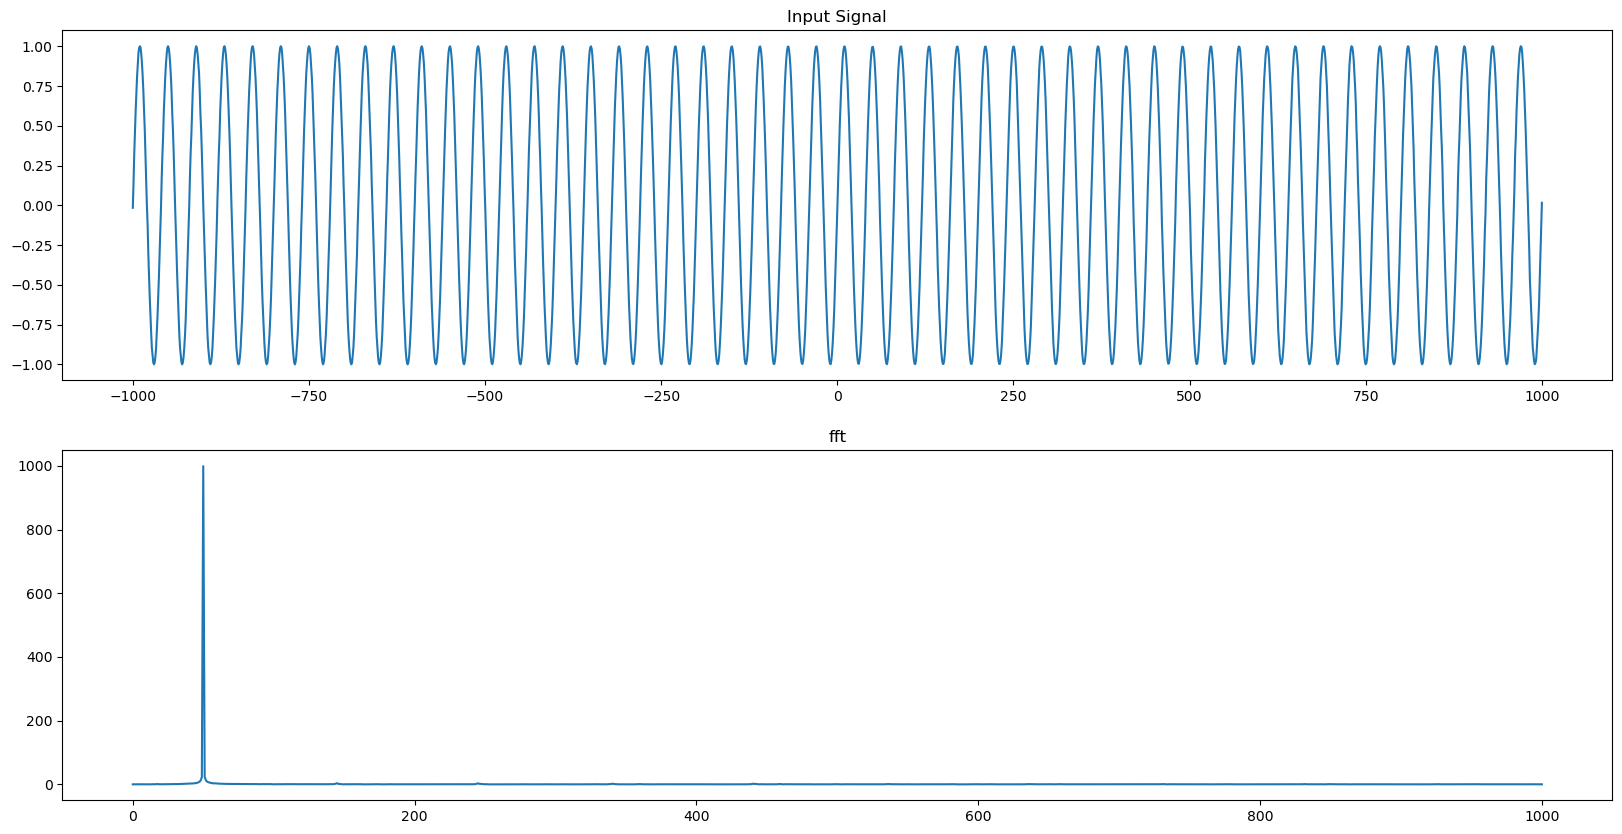

In [11]:
# signal with different frequency freq_2:
fig, axis = plt.subplots(2, figsize = (20,10))

L=2000
x = tf.linspace(-L/2,L/2, L)
# here we ahve taken amplitude as 50
signal = tf.math.sin(x*2*np.pi*50)
print(signal.shape)

axis[0].plot(x, signal)
axis[0].set_title("Input Signal")

fft = tf.signal.rfft(signal)

axis[1].plot(tf.abs(fft))
axis[1].set_title("fft")

(2000,)


Text(0.5, 1.0, 'fft')

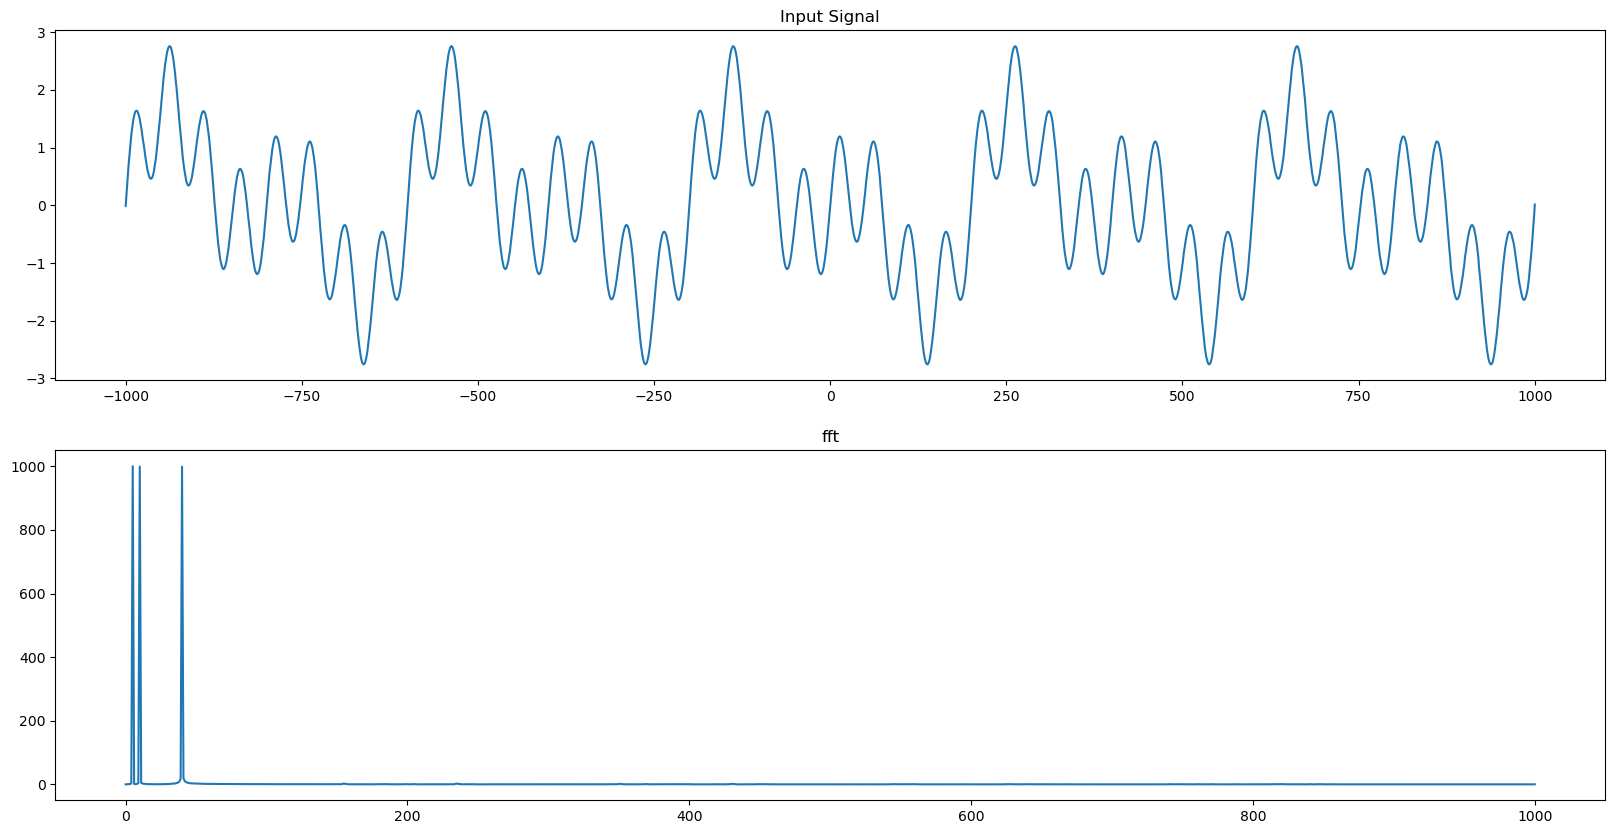

In [12]:
# signal with different frequency freq_2:
fig, axis = plt.subplots(2, figsize = (20,10))

L=2000
x = tf.linspace(-L/2,L/2, L)
# signal is combination of 3 sin waves
signal = tf.math.sin(x*2*np.pi*40) + tf.math.sin(x*2*np.pi*5) + tf.math.sin(x*2*np.pi*10)
print(signal.shape)

axis[0].plot(x, signal)
axis[0].set_title("Input Signal")

fft = tf.signal.rfft(signal)

axis[1].plot(tf.abs(fft))
axis[1].set_title("fft")

(2000,)


Text(0.5, 1.0, 'Spectrogram')

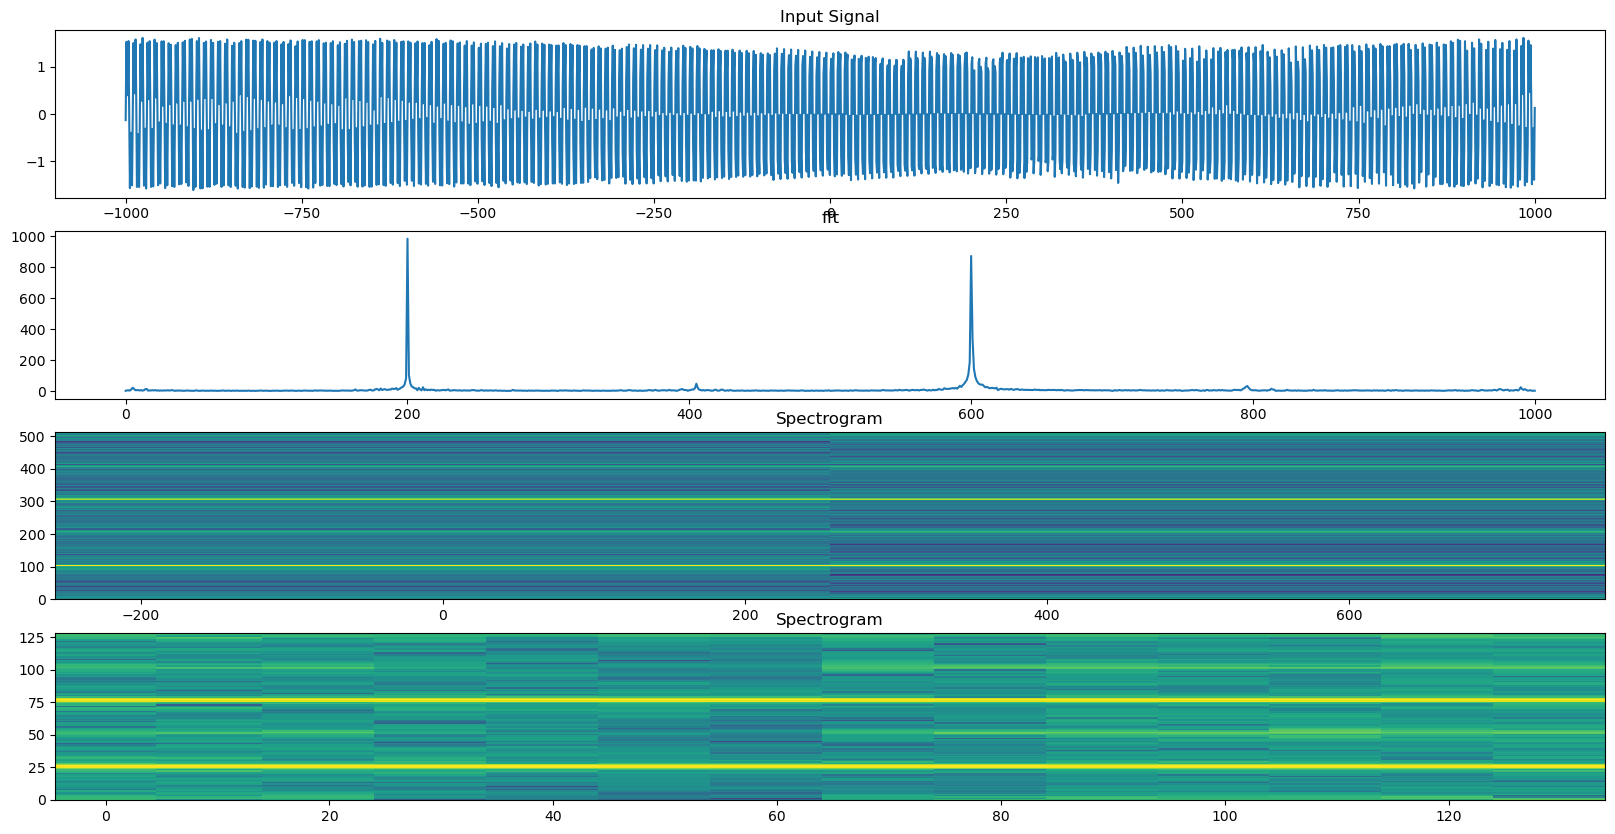

In [13]:
# applying SFTF:
fig, axis = plt.subplots(4, figsize = (20,10))
L = 2000
x = tf.linspace(-L/2, L/2, L)
signal = tf.math.sin(x*2*np.pi*600) + tf.math.sin(x*2*np.pi*200)
print(signal.shape)

axis[0].plot(x, signal)
axis[0].set_title("Input Signal")

fft= tf.signal.rfft(signal)

axis[1].plot(tf.abs(fft))
axis[1].set_title("fft")

# short time fourier transform:
spec = tf.signal.stft(signal, frame_length = 1024, frame_step = 512,)
# getting MEL features
spec = tf.transpose(tf.abs(spec), [1,0])

# taking log() of MEL features:
power_spec = np.log(spec)

height = power_spec.shape[0]
width = power_spec.shape[1]

# making Spectrogram:
X = np.linspace(0, power_spec.shape[0], num=width, dtype = int)
Y = range(height)

axis[2].pcolormesh(X, Y, power_spec)
axis[2].set_title("Spectrogram")


# another spectrogram:
spec = tf.signal.stft(signal, frame_length = 256, frame_step = 128,)
spec = tf.transpose(tf.abs(spec), [1,0])

power_spec = np.log(spec)

height = power_spec.shape[0]
width = power_spec.shape[1]

X = np.linspace(0 , height, num = width, dtype = int)
Y = range(height)

axis[3].pcolormesh(X, Y, power_spec)
axis[3].set_title("Spectrogram")

# Dataset:

In [14]:
#!wget https://data.keithito.com/data/speech/LJSpeech-1.1.tar.bz2

In [15]:
# !mkdir '/dataset/'

In [16]:
# !tar -xjvf "/LJSpeech-1.1.tar.bz2" -C "/dataset"

In [17]:
# import tarfile
# tar = tarfile.open("/home/arsh/Desktop/Project/Dataset.tar.gz")  
# tar.extractall("dataset")
# tar.close()

# Data Visualization:

In [52]:
audio_binary = tf.io.read_file("C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/wavs/LJ001-0007.wav")
# decoding the wavefile:
audio, _ = tf.audio.decode_wav(audio_binary)
waveform = tf.squeeze(audio, axis = -1)
waveform = tf.cast(waveform, tf.float32)
signal = waveform
print(signal.shape)

(184989,)


(184989,)


Text(0.5, 1.0, 'Spectrogram')

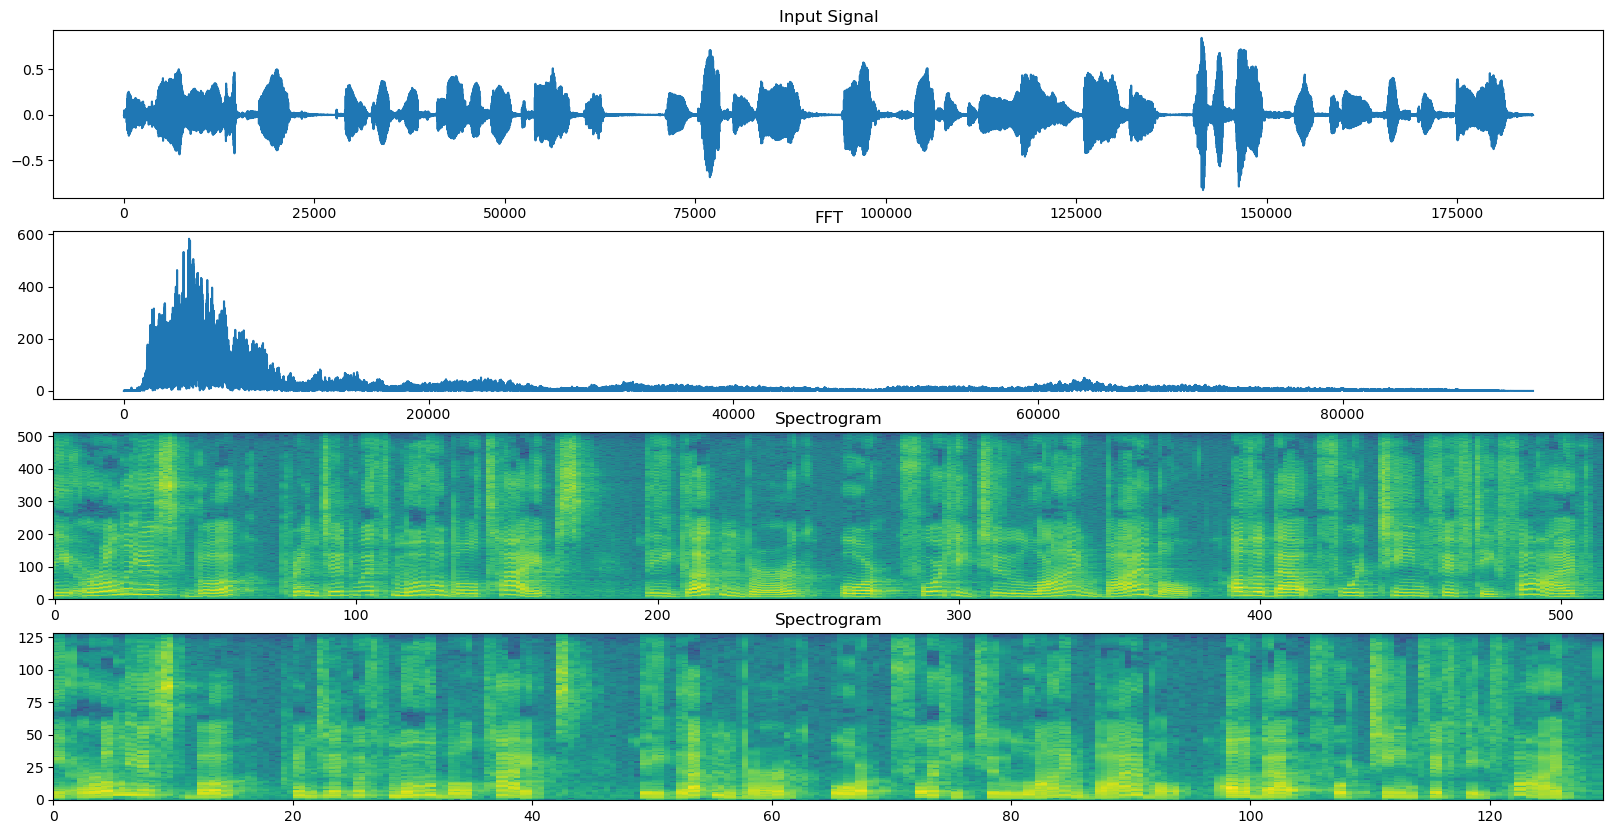

In [53]:
fig, axis = plt.subplots(4, figsize = (20,10))

L=2000
x = tf.linspace(-L/2, L/2, L)
print(signal.shape)

axis[0].plot(signal)
axis[0].set_title("Input Signal")

fft = tf.signal.rfft(signal)

axis[1].plot(tf.abs(fft))
axis[1].set_title("FFT")

spec = tf.signal.stft(signal, frame_length = 1024, frame_step = 512,)
# getting MEL features
spec = tf.transpose(tf.abs(spec), [1,0])

# taking log() of MEL features:
power_spec = np.log(spec)

height = power_spec.shape[0]
width = power_spec.shape[1]

# making Spectrogram:
X = np.linspace(0, power_spec.shape[0], num=width, dtype = int)
Y = range(height)

axis[2].pcolormesh(X, Y, power_spec)
axis[2].set_title("Spectrogram")


# another spectrogram:
spec = tf.signal.stft(signal, frame_length = 256, frame_step = 128,)
spec = tf.transpose(tf.abs(spec), [1,0])

power_spec = np.log(spec)

height = power_spec.shape[0]
width = power_spec.shape[1]

X = np.linspace(0 , height, num = width, dtype = int)
Y = range(height)

axis[3].pcolormesh(X, Y, power_spec)
axis[3].set_title("Spectrogram")

# Data Vizualization:

In [54]:
audio_text = {}

In [56]:
csv_path = "C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/metadata.csv"

with open(csv_path, encoding = 'utf-8') as file:
    for line in file:
        i = line.strip().split("|")[0]
        text = line.strip().split("|")[1]
        audio_text[str(i)] = text

In [57]:
audio_text

{'LJ001-0001': 'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition',
 'LJ001-0002': 'in being comparatively modern.',
 'LJ001-0003': 'For although the Chinese took impressions from wood blocks engraved in relief for centuries before the woodcutters of the Netherlands, by a similar process',
 'LJ001-0004': 'produced the block books, which were the immediate predecessors of the true printed book,',
 'LJ001-0005': 'the invention of movable metal letters in the middle of the fifteenth century may justly be considered as the invention of the art of printing.',
 'LJ001-0006': 'And it is worth mention in passing that, as an example of fine typography,',
 'LJ001-0007': 'the earliest book printed with movable types, the Gutenberg, or "forty-two line Bible" of about 1455,',
 'LJ001-0008': 'has never been surpassed.',
 'LJ001-0009': 'Printing, then, for our purpose, may be considered as the art of

In [62]:
filepaths = ["C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/wavs/" + filename + ".wav" for filename in list(audio_text.keys())]

transcriptions = [audio_text[str(filename)].lower() for filename in list(audio_text.keys())]
print(len(filepaths))
print(len(transcriptions))

13100
13100


In [63]:
print(filepaths[0])
print("file transcription : {}".format(transcriptions[0]))

C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/wavs/LJ001-0001.wav
file transcription : printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the exhibition


In [64]:
# making dataset:

dataset = tf.data.Dataset.from_tensor_slices((filepaths, transcriptions))

In [65]:
for i in dataset.take(2):
    print(i)

(<tf.Tensor: shape=(), dtype=string, numpy=b'C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/wavs/LJ001-0001.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the exhibition'>)
(<tf.Tensor: shape=(), dtype=string, numpy=b'C:/Users/asus/Desktop/project/dataset/dataset/LJSpeech-1.1/wavs/LJ001-0002.wav'>, <tf.Tensor: shape=(), dtype=string, numpy=b'in being comparatively modern.'>)


In [66]:
def decode_audio(audio_binary):
    audio, _ = tf.audio.decode_wav(audio_binary)
    return tf.squeeze(audio, axis = -1)

In [67]:
vocabulary = [""] + [chr(i) for i in range(97, 97+26)] + [".",",","?","&","!",";","-","'"," "]
print(vocabulary)
print(len(vocabulary))

['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '.', ',', '?', '&', '!', ';', '-', "'", ' ']
36


In [68]:
def get_label(label, seq_len = 192):
    label = tf.strings.unicode_split(label, input_encoding = "UTF-8")
    label = tf.keras.layers.StringLookup(vocabulary = vocabulary, oov_token = "")(label)
    return label

In [69]:
def get_spec(filepath, label):
    audio_binary = tf.io.read_file(filepath)
    waveform = decode_audio(audio_binary)
    waveform = tf.cast(waveform, tf.float32)
    
    sprectrogram = tf.signal.stft(
      waveform, frame_length = 255, frame_step = 128
  )

    spectrogram = tf.abs(sprectrogram)
    label = get_label(label, 192)
    return tf.expand_dims(spectrogram, axis = -1), label

In [70]:
# !pip install -U scikit-learn

In [71]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

In [72]:
# processed dataset:

processed_dataset = (
    dataset.map(get_spec, num_parallel_calls = tf.data.AUTOTUNE).padded_batch(32).prefetch(buffer_size = tf.data.AUTOTUNE)
)

In [73]:
processed_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 129, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, None), dtype=tf.int64, name=None))>

In [74]:
trained_dataset = processed_dataset.take(int(0.90*len(processed_dataset)))
validation_dataset = processed_dataset.skip(int(0.90*len(processed_dataset)))

In [75]:
for i,j in processed_dataset.take(2):
    print(i,j)

tf.Tensor(
[[[[7.12798326e-04]
   [4.62571252e-03]
   [6.20642118e-03]
   ...
   [1.35252572e-04]
   [7.60570110e-05]
   [3.36043013e-05]]

  [[4.23590001e-03]
   [7.16409134e-03]
   [3.25928186e-03]
   ...
   [9.35634525e-05]
   [5.88791190e-05]
   [2.21005175e-05]]

  [[3.52023495e-03]
   [1.79913249e-02]
   [2.51728334e-02]
   ...
   [3.46485089e-04]
   [1.54136491e-04]
   [1.43282465e-04]]

  ...

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[5.27175982e-03]
   [8.09575431e-03]
   [1.60869583e-02]
   ...
   [1.84492674e-04]
   [1.14722949e-04]
   [1.01984711e-04]]

  [[5.57353161e-03]
   [1.64909046e-02]
   [1.31872818e-01]
   ...
   [1.4465

In [76]:
for i,j in trained_dataset.take(2):
    print(i,j)

tf.Tensor(
[[[[7.12798326e-04]
   [4.62571252e-03]
   [6.20642118e-03]
   ...
   [1.35252572e-04]
   [7.60570110e-05]
   [3.36043013e-05]]

  [[4.23590001e-03]
   [7.16409134e-03]
   [3.25928186e-03]
   ...
   [9.35634525e-05]
   [5.88791190e-05]
   [2.21005175e-05]]

  [[3.52023495e-03]
   [1.79913249e-02]
   [2.51728334e-02]
   ...
   [3.46485089e-04]
   [1.54136491e-04]
   [1.43282465e-04]]

  ...

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[5.27175982e-03]
   [8.09575431e-03]
   [1.60869583e-02]
   ...
   [1.84492674e-04]
   [1.14722949e-04]
   [1.01984711e-04]]

  [[5.57353161e-03]
   [1.64909046e-02]
   [1.31872818e-01]
   ...
   [1.4465

In [77]:
for i,j in validation_dataset.take(1):
    print(i,j)

tf.Tensor(
[[[[9.30362090e-04]
   [5.33863949e-03]
   [9.51837003e-03]
   ...
   [5.37759370e-05]
   [6.62042148e-05]
   [4.62198514e-05]]

  [[2.12741992e-03]
   [7.19020190e-03]
   [1.38781518e-02]
   ...
   [6.45390610e-05]
   [4.45933474e-05]
   [3.25541478e-05]]

  [[2.13699229e-02]
   [3.65800112e-02]
   [7.60006979e-02]
   ...
   [1.20693483e-04]
   [1.38750125e-04]
   [1.63085759e-04]]

  ...

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]]


 [[[3.21160816e-03]
   [6.15771906e-03]
   [1.22493878e-02]
   ...
   [7.32516201e-05]
   [4.06024628e-05]
   [3.56571982e-05]]

  [[3.42798978e-02]
   [2.91907769e-02]
   [3.68376076e-02]
   ...
   [7.0590

# Model:

In [78]:
BATCH_SIZE = 64
LR = 1e-3
FRAME_LENGTH = 225
FRAME_SIZE = 128
N_EPOCHS = 5

In [79]:
normalization = tf.keras.layers.Normalization()

In [80]:
# using callbacks to reduce the overfitting of the model:

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint 

# ReduceLROnPlateau callback:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


# EarlyStopping callback:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ModelCheckpoint callback:
# checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')


In [81]:
from tensorflow.keras.layers import Input, Dense, Conv2D, LayerNormalization, Reshape, Bidirectional, GRU

In [82]:
from importlib.util import LazyLoader
input_spectrogram = Input((None, 129,1), name = "input")

x = normalization(input_spectrogram)
x = Conv2D(32,kernel_size = [11,41], strides  = [2,2], padding = "same", activation = "relu")(x)
x = LayerNormalization()(x)
x = Conv2D(64,kernel_size = [11,21], strides = [1,2], padding = "same", activation = "relu")(x)
x = LayerNormalization()(x)
x = Conv2D(128,kernel_size = [11,21], strides = [1,2], padding = "same", activation = "relu")(x)
x = LayerNormalization()(x)

x = Reshape((-1,x.shape[-2]*x.shape[-1]))(x)

x = Bidirectional(GRU(128, return_sequences = True))(x)
x = Bidirectional(GRU(128, return_sequences = True))(x)
x = Bidirectional(GRU(128, return_sequences = True))(x)

# final output layer: +1 is added for [LINK] in vocabulary
output = Dense(len(vocabulary)+1, activation = "softmax")(x)

model = tf.keras.Model(input_spectrogram
                       , output, name = "DeepSpeech_2_inspired")
model.summary()


Model: "DeepSpeech_2_inspired"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 129, 1)]    0         
                                                                 
 normalization (Normalizatio  (None, None, 129, 1)     3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, None, 65, 32)      14464     
                                                                 
 layer_normalization (LayerN  (None, None, 65, 32)     64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, None, 33, 64)      473152    
                                                                 
 layer_normalization_1 (Laye  (None, None, 33

In [83]:
# defining the loss:
def ctc_loss(y_true, y_pred):
    batch_size = tf.shape(y_pred)[0]
    pred_length = tf.shape(y_pred)[1]

    true_length = tf.shape(y_true)[1]

    pred_length = pred_length*tf.ones([batch_size, 1], dtype = tf.int32)
    true_length = true_length*tf.ones([batch_size, 1], dtype = tf.int32)

    return tf.keras.backend.ctc_batch_cost(y_true, y_pred, pred_length, true_length)

In [84]:
model.compile(loss = ctc_loss, optimizer = "adam")

In [43]:
# history = model.fit(
#     processed_dataset, validation_data = val_dataset, verbose = 1, epochs = 5, batch_size = 32, callbacks = [reduce_lr, early_stop]
# )

Epoch 1/5
410/410 [==============================] - 9776s 24s/step - loss: 311.9084 - val_loss: 303.5839 - lr: 0.0010
Epoch 2/5
410/410 [==============================] - 9778s 24s/step - loss: 263.7853 - val_loss: 195.7637 - lr: 0.0010
Epoch 3/5
410/410 [==============================] - 9765s 24s/step - loss: 139.0291 - val_loss: 87.8569 - lr: 0.0010
Epoch 4/5
410/410 [==============================] - 9752s 24s/step - loss: 89.1267 - val_loss: 59.0740 - lr: 0.0010
Epoch 5/5
410/410 [==============================] - 9752s 24s/step - loss: 70.7906 - val_loss: 46.6886 - lr: 0.0010


In [44]:
# from tensorflow.keras.models import load_model, save_model

# model_save_name = 'speech_recog_final_final.h5'
# path = "/home/arsh/Desktop/Project/" + model_save_name
# save_model(model, path) 


/tmp/ipykernel_3785/2888935270.py:5: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(model, path)


In [86]:
model.load_weights('C:/Users/asus/Desktop/project/speech_recog_final_final.h5')

# Testing:

In [88]:
def get_spec_inference(filepath):
    audio_binary=tf.io.read_file(filepath)
    waveform=decode_audio(audio_binary)
    waveform=tf.cast(waveform,tf.float32)

    spectrogram=tf.signal.stft(
      waveform,frame_length=FRAME_LENGTH,frame_step=FRAME_STEP)

    spectrogram=tf.abs(spectrogram)

    return tf.expand_dims(spectrogram,axis=-1)

In [134]:
test_path = 'C:/Users/asus/Desktop/project/LJ001-0014.wav'

In [135]:
FRAME_STEP=128

In [136]:
spectrogram=get_spec_inference(test_path)
print(spectrogram.shape)
out=tf.argmax(model.predict(tf.expand_dims(spectrogram,axis=0))[0],axis=1)

(1712, 129, 1)
1/1 [==============================] - 1s 1s/step


In [137]:
out

<tf.Tensor: shape=(856,), dtype=int64, numpy=
array([36, 36, 36, 36, 36, 36, 36, 36,  1, 36, 36, 36, 36, 36, 36, 14,  4,
       36, 36, 36, 36, 35,  9, 36, 36, 20, 36, 36, 36, 36, 36, 35, 35, 23,
        1,  1, 36, 36, 36, 36, 36, 19, 19, 36, 35, 35,  1, 36, 36, 36, 36,
       36, 36, 36, 36, 35, 13,  1, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36,
       20, 36, 36, 36, 20,  5, 18, 36, 36, 36, 35, 35, 18, 15, 15, 36,  6,
        6, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 35,  3, 15, 21, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 18, 18, 18, 36, 36, 36,
       36, 36, 36, 36, 36, 36, 36, 36, 19,  5, 36, 36, 36, 36, 36, 36, 36,
       36, 36, 36, 36, 35, 35, 20,  8,  1, 36, 36, 36, 36, 36, 36, 36, 36,
       20, 20, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35,
       35,  9, 36, 14, 14, 14, 36, 36, 36, 36, 35, 35, 20,  8,  5,  5, 36,
       36, 36, 36, 36, 35, 35, 13,  9, 36, 36, 36, 36, 36, 36, 36,  4, 36,
       36, 12, 36, 36, 36, 36, 36, 12,  1,  1, 36, 36,

In [138]:
len(vocabulary)

36

In [139]:
vocabulary[-1]

' '

In [140]:
out_list=[vocabulary[i] if i!=36 else "[LINK]" for i in out]
out_str="".join(out_list)

In [141]:
print(out_str)

[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]a[LINK][LINK][LINK][LINK][LINK][LINK]nd[LINK][LINK][LINK][LINK] i[LINK][LINK]t[LINK][LINK][LINK][LINK][LINK]  waa[LINK][LINK][LINK][LINK][LINK]ss[LINK]  a[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK] ma[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]t[LINK][LINK][LINK]ter[LINK][LINK][LINK]  roo[LINK]ff[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]  cou[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]rrr[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]se[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]  tha[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]tt[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]  i[LINK]nnn[LINK][LINK][LINK][LINK]  thee[LINK][LINK][LINK][LINK][LINK]  mi[LINK][LINK][LINK][LINK][LINK][LINK][LINK]d[LINK][LINK]l[LINK][LINK][LINK][LINK][LINK]laa[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][L

In [142]:
def decode(y_pred):
    batch_size=tf.shape(y_pred)[0]
    print(tf.shape(y_pred))

    pred_length=tf.shape(y_pred)[1]
    pred_length*=tf.ones([batch_size,],dtype=tf.int32)

    y_pred=tf.one_hot(y_pred,len(vocabulary)+1)
    output=tf.keras.backend.ctc_decode(y_pred,input_length=pred_length,greedy=True)[0][0]

    out=[vocabulary[i] for i in output[0]]
    return ''.join(out)

In [143]:
print(decode(tf.expand_dims(out,axis=0)))

tf.Tensor([  1 856], shape=(2,), dtype=int32)
and it was a matter rof course that in the midllages when the cratsmen t ok carn that butefulformsiount alwys be apart o ther prdoctions whet ever they wore                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            


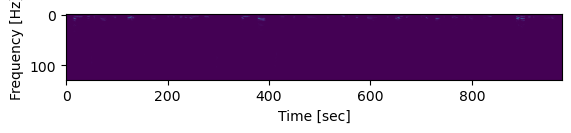

In [131]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

sample_rate, samples = wavfile.read('C:/Users/asus/Desktop/project/LJ001-0014.wav')
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)

plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [132]:
!pip install ipywidgets

In [133]:
!pip install pyaudio

In [166]:
!pip install librosa

In [162]:
import ipywidgets as widgets
from IPython.display import display
from threading import Thread
from queue import Queue
import pyaudio
import wave
import librosa
import soundfile as sf

In [163]:
CHUNK = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
RECORD_SECONDS = 10
WAVE_OUTPUT_FILENAME = "recorded_file.wav"

record_button = widgets.Button(
    description = "Record",
    disabled = False,
    button_style = "success",
    icon = "microphone"
)

output = widgets.Output()

def start_recording(data):
    p = pyaudio.PyAudio()
    stream = p.open(format = FORMAT, channels = CHANNELS, rate = RATE, input = True, frames_per_buffer = CHUNK)
    print("Recording has started...")
    array_frames = []
    for i in range(0, int(RATE/CHUNK*RECORD_SECONDS)):
        data = stream.read(CHUNK)
        array_frames.append(data)
    print("Recording Stopped!")
    stream.stop_stream()
    p.terminate()

    waveform = wave.open(WAVE_OUTPUT_FILENAME, "wb")
    waveform.setnchannels(CHANNELS)
    waveform.setsampwidth(pyaudio.get_sample_size(FORMAT))
    waveform.setframerate(RATE)
    waveform.writeframes(b''.join(array_frames))
    waveform.close()
record_button.on_click(start_recording)
display(record_button)

Button(button_style='success', description='Record', icon='microphone', style=ButtonStyle())

In [176]:
# stereo_audio_path = 'C:/Users/asus/Desktop/project/gettysburg10.wav'
# y, sr = librosa.load(stereo_audio_path, sr=None, mono=False)
# y_mono = librosa.to_mono(y)
# mono_audio_path = 'C:/Users/asus/Desktop/project/harvard_mono.wav'
# sf.write(mono_audio_path, y_mono, sr)

In [185]:
recorded_file_path = 'C:/Users/asus/Desktop/project/preamble.wav'
spectrogram_recorded = get_spec_inference(recorded_file_path)
print(spectrogram_recorded.shape)
out_recorded=tf.argmax(model.predict(tf.expand_dims(spectrogram_recorded,axis=0))[0],axis=1)

(3289, 129, 1)
1/1 [==============================] - 1s 1s/step


In [186]:
print(out_recorded.shape)
print(out_recorded)

(1645,)
tf.Tensor([36 36 36 ... 36  0 36], shape=(1645,), dtype=int64)


In [187]:
out_recorded_list = [vocabulary[i] if i!=36 else '[LINK]' for i in out_recorded]
out_recorded_list = "".join(out_recorded_list)
out_recorded_list

'[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]mee[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]v[LINK][LINK][LINK][LINK]  he[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK] ppe[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]uu[LINK][LINK][LINK]lll[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]  o[LINK][LINK][LINK]f[LINK][LINK][LINK][LINK][LINK]  te[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]  a[LINK][LINK][LINK][LINK][LINK][LINK][LINK]n[LINK][LINK][LINK][LINK]in[LINK][LINK][LINK][LINK][LINK][LINK] s[LINK][LINK][LINK][LINK][LINK][LINK]ti[LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK][LINK]ks[LINK][LINK][LINK][LINK][LINK][LINK][LINK][L

In [188]:
print(decode(tf.expand_dims(out_recorded, axis = 0)))

tf.Tensor([   1 1645], shape=(2,), dtype=int32)
mev he peul of te anin stiks e odergefomerm wo por orcunen astel ash tuftuhe on surdem eter trnquoi hr vide o a comobefenc the mol pegenamafer and th torogtamoting vemover pors woe mo ostur, moor danan as fealsh bis coicurgion freven iinsbe cor imor.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              